In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import math
import matplotlib.pyplot as plt
import scipy.stats.mstats as ma
warnings.filterwarnings('ignore')

In [ ]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'diabetes'
table_name = 'diabetes'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

d_df=pd.read_sql_query('select * from diabetes',con=engine)

engine.dispose()

In [ ]:
d_df.head()
#target variable is categorical - classification problem


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
0,5,44,62,0,0,25.0,0.587,36,0
1,2,56,56,28,45,24.2,0.332,22,0
2,9,57,80,37,0,32.8,0.096,41,0
3,0,57,60,0,0,21.7,0.735,67,0
4,3,61,82,28,0,34.4,0.243,46,0


In [ ]:
print(d_df[d_df['pregnancies']>=3].shape)
print(d_df.shape)
print(d_df.isnull().sum())
d_df.describe()

(417, 9)
(763, 9)
pregnancies          0
glucose              0
blood_pressure       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
age                  0
outcome              0
dtype: int64


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,69.115334,20.477064,80.292267,31.986763,0.472477,33.271298,0.348624
std,3.374729,30.535641,19.399240,15.973171,115.457448,7.893221,0.331963,11.772161,0.476847
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
index=d_df[(d_df['skin_thickness']==0) | (d_df['insulin']==0) | (d_df['bmi']==0) | (d_df['blood_pressure']==0)].index

In [ ]:
#remove 371 rows
d_df.drop(index, inplace=True)

In [ ]:
d_df.corr()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
blood_pressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
skin_thickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
bmi,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
diabetes_pedigree,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


In [ ]:
exp_df=d_df.iloc[:,[0,1,2,3,4,5,6,7]]
exp_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age
1,2,56,56,28,45,24.2,0.332,22
8,2,68,70,32,66,25.0,0.187,25
9,2,68,62,13,15,20.1,0.257,23
10,10,68,106,23,49,35.5,0.285,47
12,1,71,48,18,76,20.4,0.323,22


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(exp_df)
sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X)
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_.sum()
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 0.6643833152134108


In [ ]:
#370 entries with 0 skin_thickness or insulin 
for column_name in d_df.columns:
    print("Unique values in column {} are: {}".format(column_name, d_df[column_name].unique()))

Unique values in column pregnancies are: [ 5  2  9  0  3  7  8 10  1  4 13  6 12 11 14 15 17]
Unique values in column glucose are: [ 44  56  57  61  62  65  67  68  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 186 187 188 189
 190 191 193 194 195 196 197 198 199]
Unique values in column blood_pressure are: [ 62  56  80  60  82  78  72  76  70 106  48  50   0  68  52  64  88  75
  55  66  74  86  58  65  90  30  24  85  54  92 100 122  84  44 108  38
  94  98  96  46 110 102  40  61 114 104  95]
Unique values in column skin_thickness are: [ 0 28 37 23 32 13 27 18 50 25 10 40 24 

In [ ]:
d_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
0,5,44,62,0,0,25.0,0.587,36,0
1,2,56,56,28,45,24.2,0.332,22,0
2,9,57,80,37,0,32.8,0.096,41,0
3,0,57,60,0,0,21.7,0.735,67,0
4,3,61,82,28,0,34.4,0.243,46,0


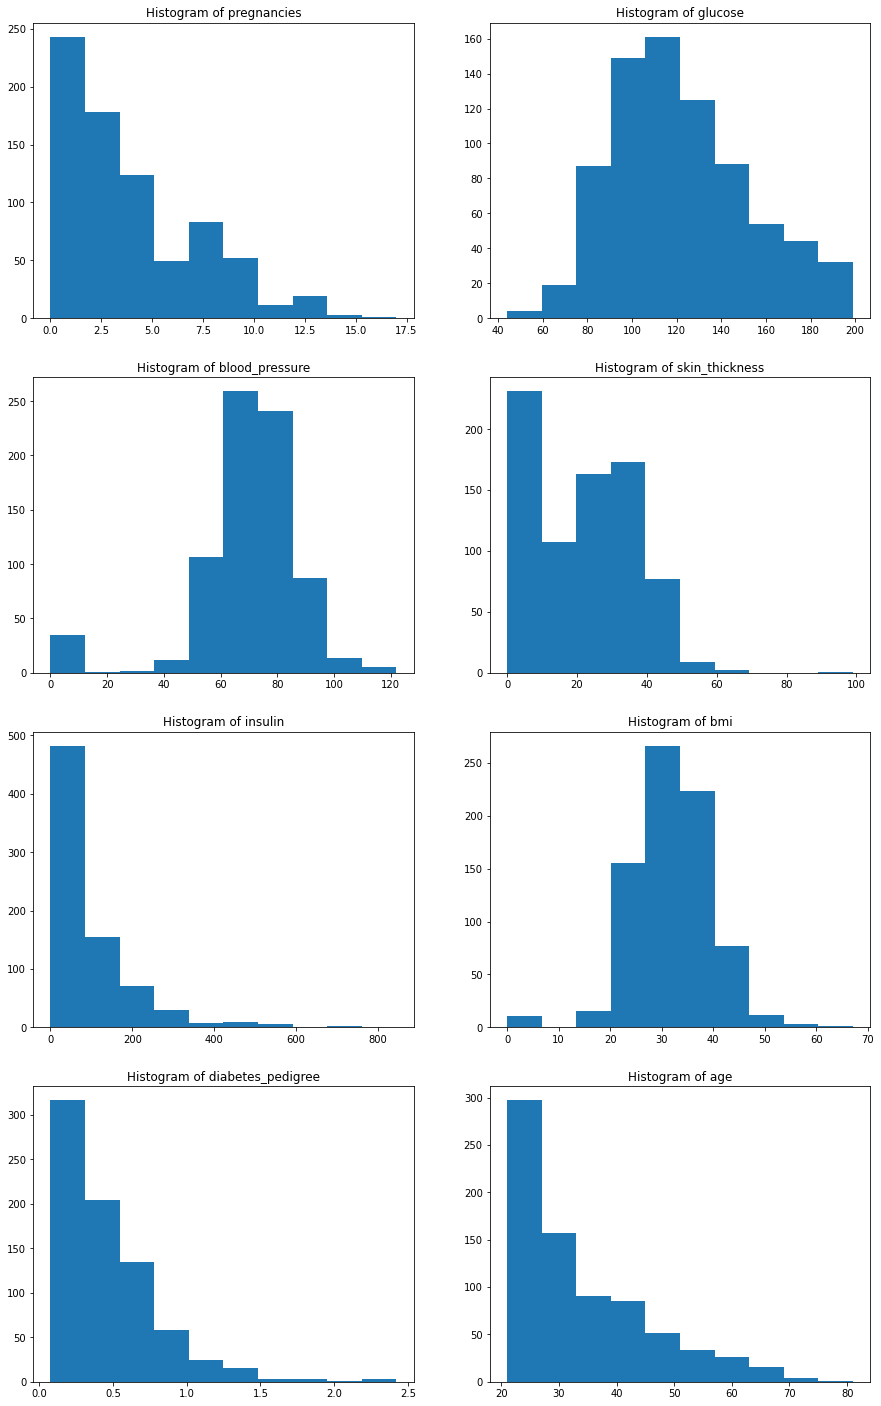

In [ ]:
cols=['pregnancies','glucose','blood_pressure','skin_thickness','insulin','bmi','diabetes_pedigree','age']
plt.figure(figsize = (15,25))
for num, col in enumerate(cols):
    plt.subplot(4,2,num+1)
    plt.hist(d_df[col])
    plt.title("Histogram of "+col)
plt.show()

In [ ]:
#replace zero values with mean
z_col=['skin_thickness','insulin','bmi','blood_pressure']
for col in z_col:
    index = d_df[d_df[col]==0].index
    d_df.loc[index, col] = d_df[d_df[col]!=0][col].mean()

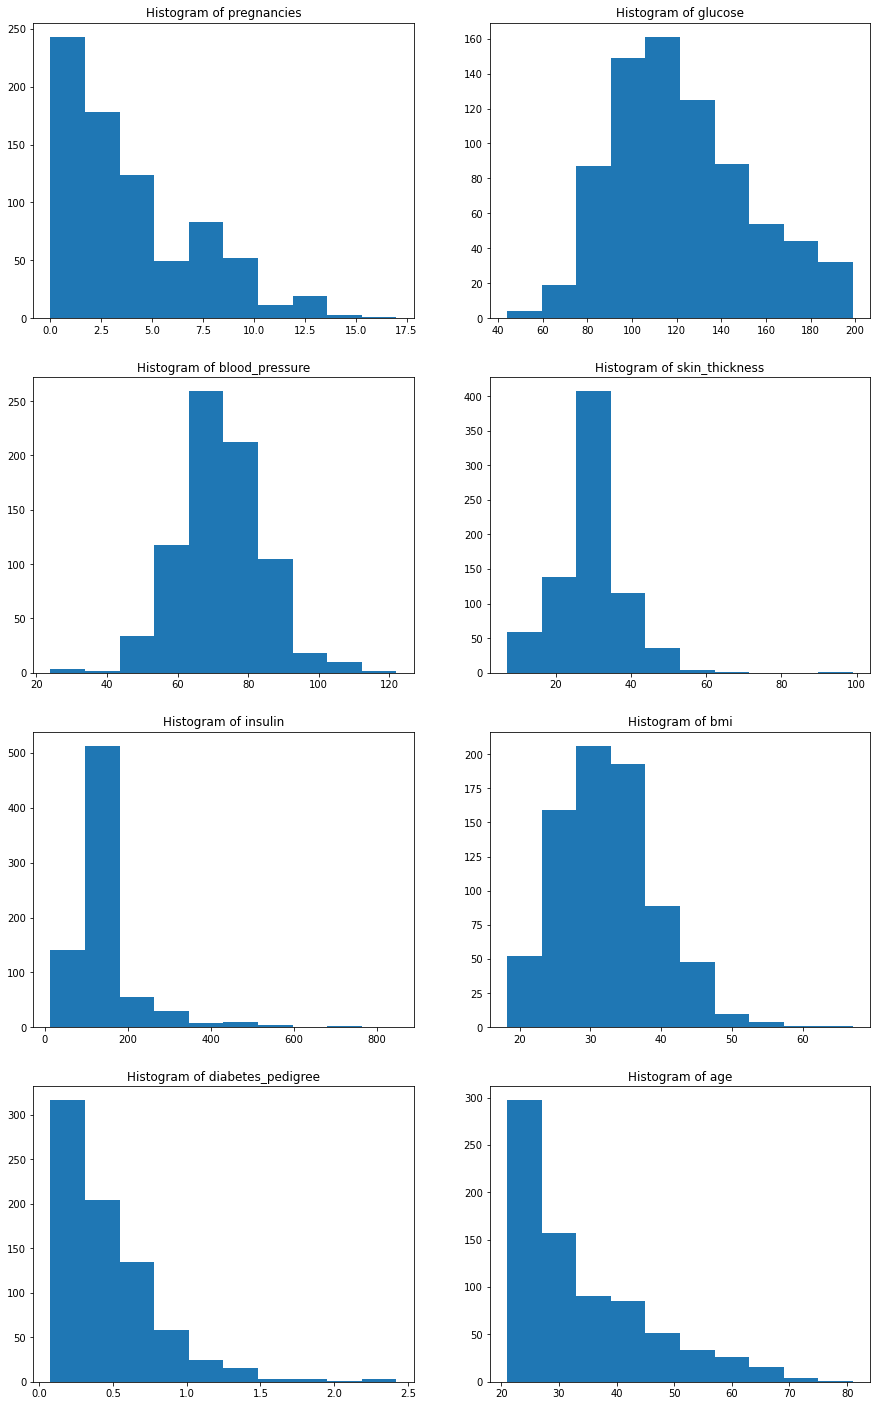

In [ ]:
plt.figure(figsize = (15,25))
for num, col in enumerate(cols):
    plt.subplot(4,2,num+1)
    plt.hist(d_df[col])
    plt.title("Histogram of "+col)
plt.show()

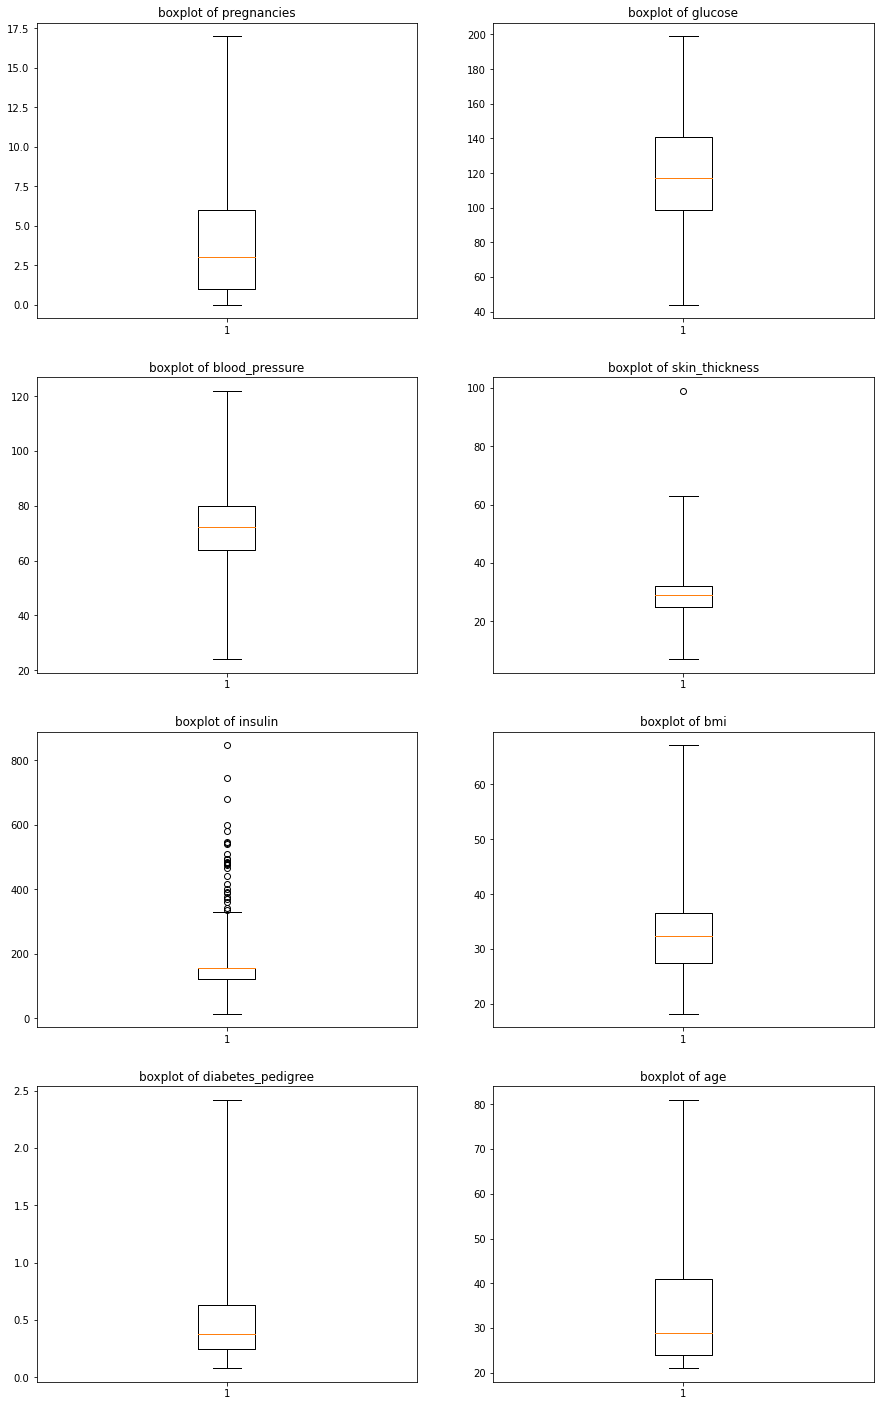

In [ ]:
plt.figure(figsize = (15,25))
for num, col in enumerate(cols):
    plt.subplot(4,2,num+1)
    plt.boxplot(d_df[col],whis=5)
    plt.title("boxplot of "+col)
plt.show()

In [ ]:
d_df[d_df['insulin']>500]

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
449,8,124,76.0,24.0,600.0,28.7,0.687,52,1
643,5,155,84.0,44.0,545.0,38.7,0.619,34,0
645,2,155,52.0,27.0,540.0,38.7,0.240,25,1
677,0,165,90.0,33.0,680.0,52.3,0.427,23,0
697,1,172,68.0,49.0,579.0,42.4,0.702,28,1
726,0,181,88.0,44.0,510.0,43.3,0.222,26,1
741,1,189,60.0,23.0,846.0,30.1,0.398,59,1
757,2,197,70.0,45.0,543.0,30.5,0.158,53,1
758,4,197,70.0,39.0,744.0,36.7,2.329,31,0
